<IPython.core.display.Javascript object>


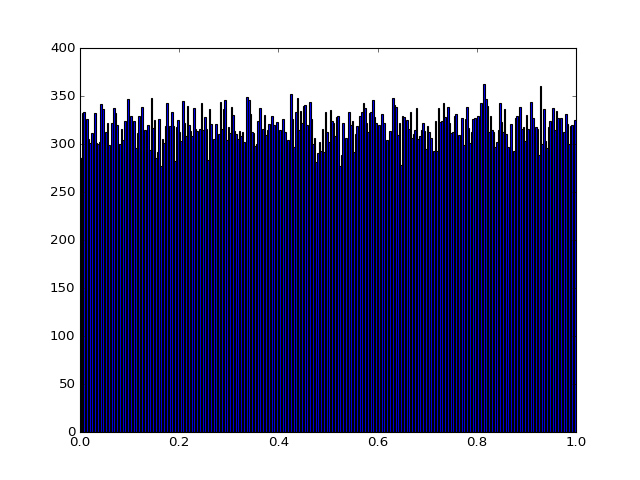

0.500981580288
0.288477754069


In [1]:
%matplotlib notebook

import numpy
from matplotlib import pyplot
import amuse.plot as amuse_plot

from amuse.units import units
from amuse.units import constants

Nparticles = 100000
u = numpy.random.uniform(0, 1, Nparticles)

pyplot.hist(u, bins=int(numpy.sqrt(Nparticles)))
pyplot.show()

print numpy.mean(u)
print numpy.std(u)

In [3]:
def distribution_function(E):
    a = 1088.60513143 | units.kpc
    M_dm = 3.2e+15 | units.MSun

    v_g = numpy.sqrt(constants.G * M_dm / a)
    if E:
        q = numpy.sqrt(-1.0 * E/v_g**2)  # 0 <= q <= 1
        f_of_E = M_dm/(8*numpy.sqrt(2)*numpy.pi**3*a**3*v_g**3) * (1 - q**2)**(-5./2)\
            * (3 * numpy.arcsin(q) + q*(1-q**2)**1./2 *(1-2*q**2)*(8*q**4-8*q**2-3))
        print "E =", E
        print "q =", q
        print "f_of_E =", f_of_E
        #pyplot.scatter(q, numpy.log(f_of_E.value_in(units.kg*units.s**3*units.kpc**-6)/
        #               numpy.average(f_of_E.value_in(units.kg*units.s**3*units.kpc**-6))), c="r")
    
    
    q = numpy.random.uniform(0, 1, 100000)
    f_of_E = M_dm/(8*numpy.sqrt(2)*numpy.pi**3*a**3*v_g**3) * (1 - q**2)**(-5./2)\
        * (3 * numpy.arcsin(q) + q*(1-q**2)**1./2 *(1-2*q**2)*(8*q**4-8*q**2-3))
    
    #print "v_g =", v_g
    #print "q =", q
    
    # print "f(E) =", f_of_E[0:10]
    
    fig = pyplot.figure()
    amuse_plot.scatter(q, numpy.log(f_of_E.value_in(units.kg*units.s**3*units.kpc**-6)/
                       numpy.average(f_of_E.value_in(units.kg*units.s**3*units.kpc**-6))), c="b")
    amuse_plot.xlabel(r'$q$')
    amuse_plot.ylabel(r'$\log \left[ f(E)/<f(E)> \right]$')
    pyplot.show()
    return f_of_E

In [4]:
from amuse.io import read_set_from_file
ClusterA_dm = read_set_from_file('ClusterA_dm', 'amuse')
ClusterA_gas = read_set_from_file('ClusterA_gas', 'amuse')
print ClusterA_dm[0]

Particle(14678009966118889636, density=1.44645504766e-26 1000.0 * m**-3 * kg, mass=3.77368284614e+14 1.98892e+30 * kg, pressure=2.60747313812e-11 m**-1 * kg * s**-2, radius=0.0 length, temperature=118247975.145 K, vx=0.0 m * s**-1, vy=0.0 m * s**-1, vz=0.0 m * s**-1, x=-537.102285378 3.08567758128e+19 * m, y=4611.79420266 3.08567758128e+19 * m, z=-8469.11666139 3.08567758128e+19 * m)


-148543.26079 64456507448.0 * m**2 * s**-2
[0.0] 64456507448.0 * m**2 * s**-2
2637842819904178958
[2637842819904178958]
E = [-9.57457979549e+15, -8.18306886374e+15, -6.42229259989e+15, -5.57084782662e+15, -1.05106767309e+16, -5.79173106878e+15, -4.38510447289e+15, -2.39861974782e+15, -4.94775385527e+15, -9.19446360109e+14] m**2 / (s**2)
q = [ 27.51594704  25.43798497  22.53562709  20.98868604  28.82968803
  21.40074032  18.62149633  13.77226295  19.78010745   8.52683388]
f_of_E = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] 4.13680952522e-45 * m**-6 * kg * s**3.0


/net/glados2.science.uva.nl/api/thalbes1/prerequisites-10.0/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in power
/net/glados2.science.uva.nl/api/thalbes1/prerequisites-10.0/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in arcsin


<IPython.core.display.Javascript object>


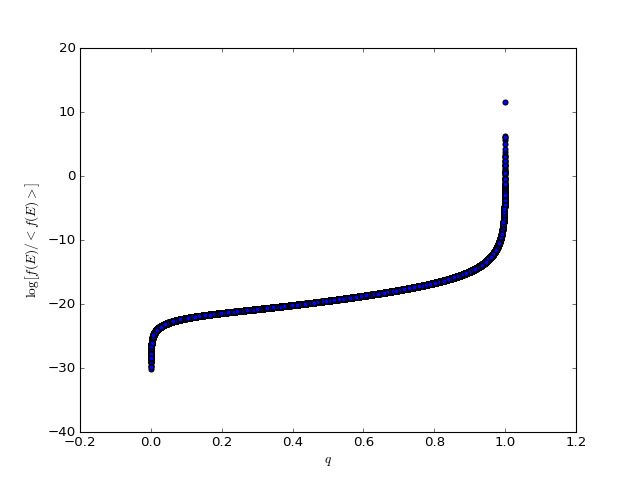

In [37]:
# Step 1: calculate the maximum potential energy a particle may have given its position
# particle.potential() returns the potential at the position of the particle.
print ClusterA_dm[0].potential()
print ClusterA_dm[0:1].potential()

print ClusterA_dm[0].key
print ClusterA_dm[0:1].key

# Step 2: Calculate the maximum of the DF for that particle

E = ClusterA_dm.potential()[0:10].as_quantity_in(units.m**2/units.s**2)
# max potential energy = -GM/r = -1.0 * constants.G * ClusterA.M_dm/ particle.r (?) should we use total mass?
# max DF = DF(max potential energy) ? but then q hast to lie between 0 and 1??? q = sqrt(-a/GM E)
# what if q does not lie between 0 and 1 for a given E?
# print "E =", E
tmp = distribution_function(E)
# amuse_plot.plot(distribution_function(E))

In [ ]:
# Set with potential energy for every particle in set
# print ClusterA_dm.potential()

-9.81044107747e+19 erg / kg
-7.46463778218e+19 erg / kg
-2.11755309021e+19 erg / kg
-4.40891011019e+18 erg / kg
-9.3312960127e+18 erg / kg
-6.36139217333e+19 erg / kg
-9.78021160223e+19 erg / kg
-5.65697852162e+19 erg / kg
-2.6198206706e+17 erg / kg
-6.55446945076e+14 erg / kg


/net/glados2.science.uva.nl/api/thalbes1/prerequisites-10.0/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in power
/net/glados2.science.uva.nl/api/thalbes1/prerequisites-10.0/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in arcsin


<IPython.core.display.Javascript object>


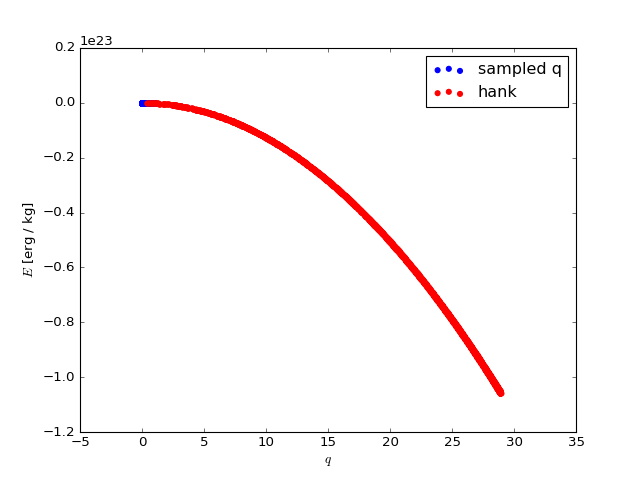

<IPython.core.display.Javascript object>


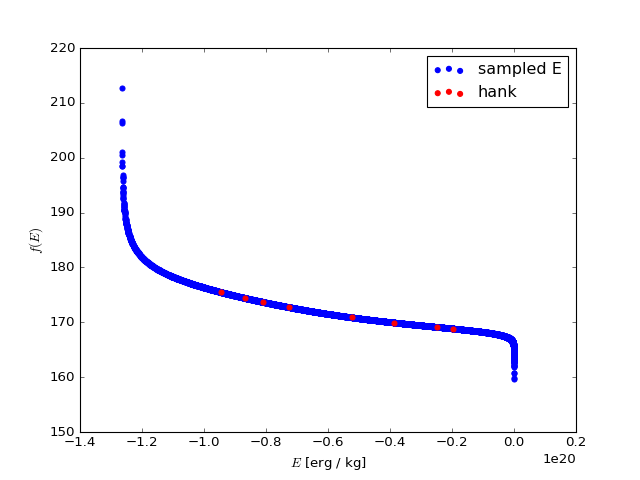

In [5]:
# If 0 <= q <= 1, and E = -GM*q^2/a

a = 1088.60513143 | units.kpc
M_dm = 3.2e+15 | units.MSun  # Misschien moet dit wel M(<r) zijn?
v_g = numpy.sqrt(constants.G*M_dm/a)

q = numpy.random.uniform(0, 1, 10000)
E = -1.0 * constants.G * M_dm * q**2/a
f_of_E = M_dm/(8*numpy.sqrt(2)*numpy.pi**3*a**3*v_g**3) * (1-q**2)**(-5./2) *\
    (3*numpy.arcsin(q) + q*(1-q**2)**1./2 * (1-q**2)**(8*q**4 - 8*q**2 -3))

for e in E[0:10]:
    print e.as_quantity_in(units.erg/units.kg)

particle_E = ClusterA_dm.potential().as_quantity_in(units.erg/units.kg)
particle_q = numpy.sqrt(-1.0*particle_E * a/(constants.G*M_dm))
particle_f_of_E = M_dm/(8*numpy.sqrt(2)*numpy.pi**3*a**3*v_g**3) * (1-particle_q**2)**(-5./2) *\
    (3*numpy.arcsin(particle_q) + particle_q*(1-particle_q**2)**1./2 * (1-particle_q**2)**(8*particle_q**4 - 8*particle_q**2 -3))

pyplot.figure()
amuse_plot.scatter(q, E.as_quantity_in(units.erg/units.kg), c="b", edgecolor='face', label="sampled q")
amuse_plot.scatter(particle_q, particle_E, c="r", edgecolor='face', label="hank")
amuse_plot.xlabel(r'$q$')
amuse_plot.ylabel(r'$E$')
pyplot.legend()


pyplot.figure()
amuse_plot.scatter(E.as_quantity_in(units.erg/units.kg), numpy.log(f_of_E.value_in(units.kg*units.s**3*units.kpc**-6)),
                   c="b", edgecolor='face', label="sampled E")
amuse_plot.scatter(particle_E.as_quantity_in(units.erg/units.kg), numpy.log(particle_f_of_E.value_in(units.kg*units.s**3*units.kpc**-6)),
                   c="r", edgecolor='face', label="hank")
amuse_plot.ylabel(r'$f(E)$')
amuse_plot.xlabel(r'$E$')

pyplot.legend()

<IPython.core.display.Javascript object>


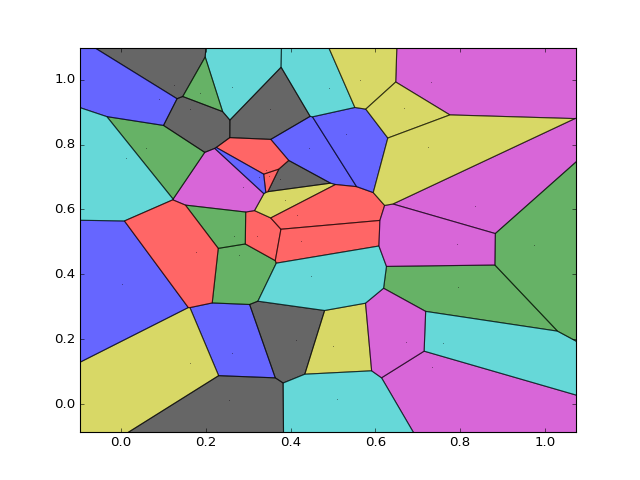

In [34]:
# https://stackoverflow.com/questions/20515554/colorize-voronoi-diagram
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
np.random.seed(1337)
points = np.random.rand(42, 2)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
#print "--"
#print regions
#print "--"
#print vertices

# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.6)

plt.plot(points[:,0], points[:,1], 'mo', ms=0.2)
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

In [2]:
%matplotlib inline
import time
import numpy
from matplotlib import pyplot
from amuse.units import units, constants
from amuse.units.quantities import VectorQuantity
import amuse.plot as amuse_plot 

In [3]:
def print_progressbar(i, tot):
    import sys
    bar_width = 42  # obviously
    progress = float(i)/tot
    block = int(round(bar_width * progress))
    sys.stdout.write(
        "\r[{0}{1}] {2:.2f}% \t{3}/{4}"
        .format('#'*block, ' '*(bar_width - block),
                progress*100, i, tot))
    sys.stdout.flush()

In [4]:
# Copy calculated a, and assumed M_dm for now.
a = 1088.60513143 | units.kpc
M_dm = 3.2e+15 | units.MSun  # Misschien moet dit wel M(<r) zijn?
v_g = numpy.sqrt(constants.G*M_dm/a)

def dm_cummulative_mass(r):
    """ Dark Matter cummulative mass profile M_DM(<r). Given by Hernquist (1990) """
    M_dm_below_r = M_dm * r**2 / (r + a)**2
    return M_dm_below_r.as_quantity_in(units.MSun)


def distribution_function(E):
    """ Dark Matter velocity distribution function. Given by Hernquist (1990) """
    f_of_E = M_dm/(8*numpy.sqrt(2)*numpy.pi**3*a**3*v_g**3) * (1-q**2)**(-5./2) *\
        (3*numpy.arcsin(q) + q*(1-q**2)**1./2 * (1-q**2)**(8*q**4 - 8*q**2 -3))
    return f_of_E

q = numpy.random.uniform(0, 1, 100000)
# E = -1.0 * constants.G * M_dm * q**2/a


start_time = time.time()
Ndm = int(1e5)
mass = numpy.random.uniform(0, 1, Ndm) * M_dm

# Step 2) obtain r(M) by numerically inverting trough a table (?). But why does this make sense?
# Also, how does this give you same-mass particles?
# Also, in logspace this results in less particles in the center of the cluster 
invertion_radius = VectorQuantity.arange(units.kpc(0), units.Mpc(5), units.parsec(10))
invertion_mass = dm_cummulative_mass(invertion_radius)

In [5]:
radius = numpy.zeros(Ndm) | units.kpc
for i, m in enumerate(mass):
    radius[i] = (invertion_radius[(numpy.abs(invertion_mass.value_in(units.MSun)\
        -m.value_in(units.MSun))).argmin()])
    # Printing in general slows life down, but not knowing the progress slows my happiness down
    if i % 100 is 0:
        print_progressbar(i+1, Ndm)

print "\nRuntime: {0} seconds".format(time.time() - start_time)

[##########################################] 99.90% 	99901/100000
Runtime: 336.078346014 seconds


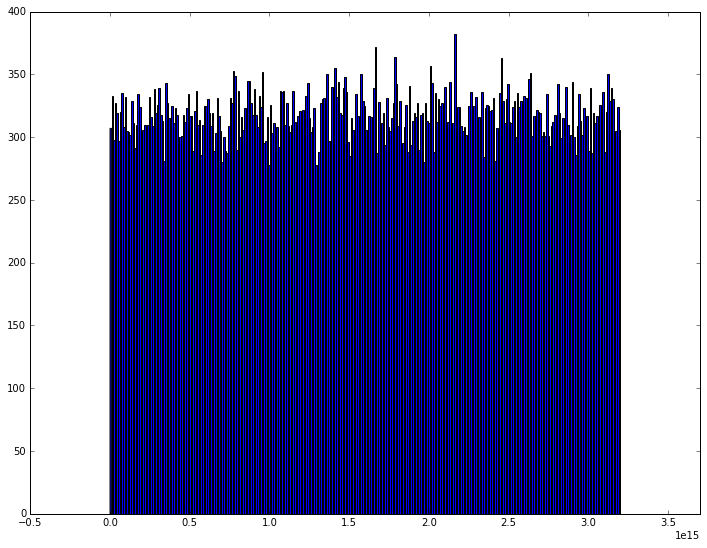

mean mass 1.60220429812e+15 MSun
stddev mass 9.22127730159e+14 MSun
Cutoff radius: 4999.99 kpc


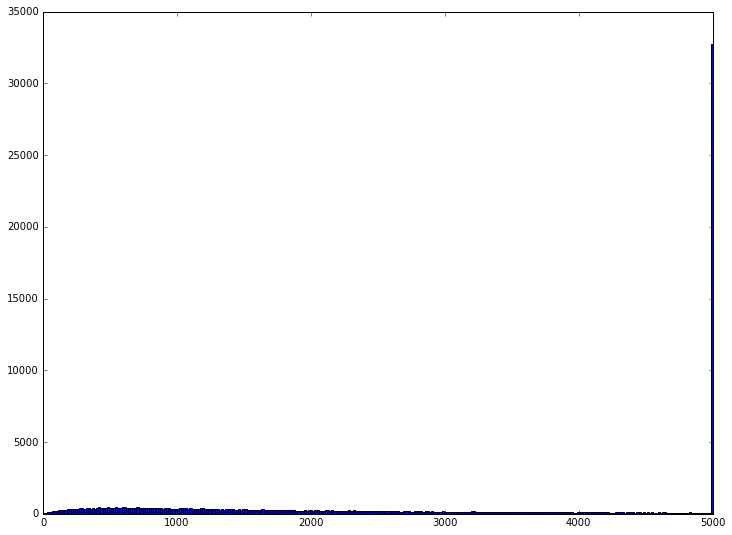

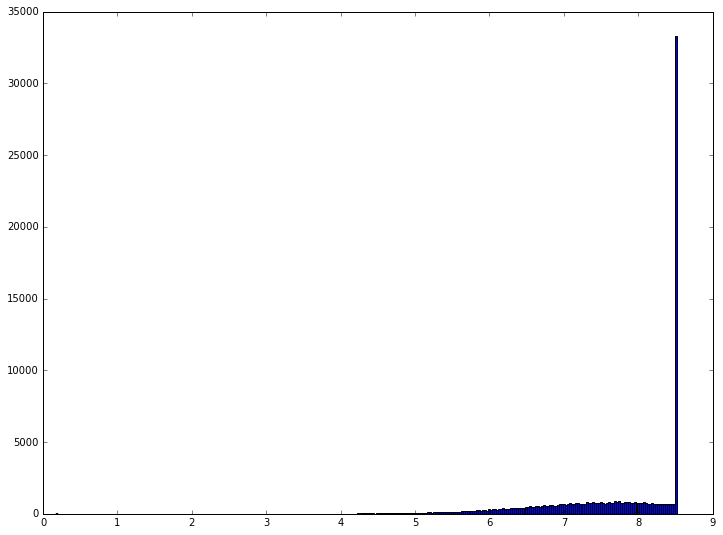

mean radius 2859.8103637 kpc
stddev radius 1824.20423295 kpc


In [6]:
fig = pyplot.figure(figsize=(12, 9))
amuse_plot.hist(mass, bins=int(numpy.sqrt(len(mass))))
amuse_plot.xlim(-0.5e15 | units.MSun, M_dm + (0.5e15 | units.MSun))
pyplot.show()

mean = numpy.mean(mass).as_quantity_in(units.MSun)
stdev = numpy.std(mass).as_quantity_in(units.MSun)
print "mean mass", mean
print "stddev mass", stdev

cutoff_radius = (invertion_radius[(numpy.abs(invertion_mass.value_in(units.MSun)\
        -M_dm.value_in(units.MSun))).argmin()])
print "Cutoff radius:", cutoff_radius

fig = pyplot.figure(figsize=(12, 9))
amuse_plot.hist(radius, bins=int(numpy.sqrt(len(radius))))
pyplot.show()

fig = pyplot.figure(figsize=(12, 9))
amuse_plot.hist(numpy.log(radius.value_in(units.kpc)), bins=int(numpy.sqrt(len(radius))))
pyplot.show()

mean = numpy.mean(radius).as_quantity_in(units.kpc)
stdev = numpy.std(radius).as_quantity_in(units.kpc)
print "mean radius", mean
print "stddev radius", stdev


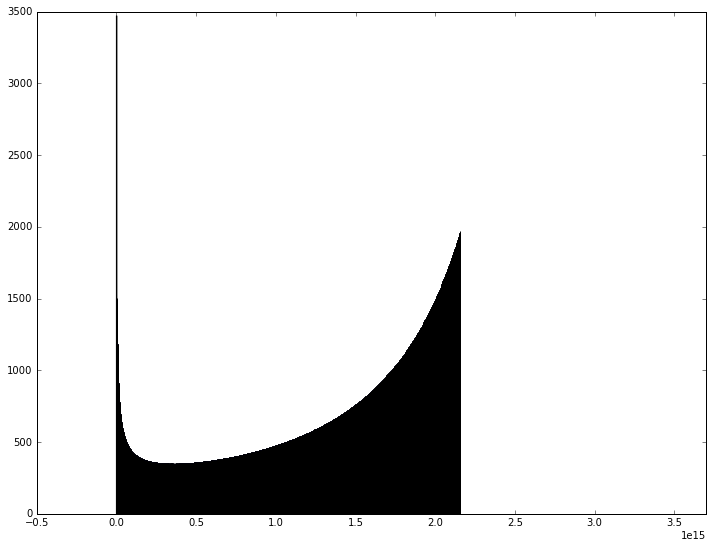

mean mass 1.37334455031e+15 MSun
stddev mass 6.39730284082e+14 MSun


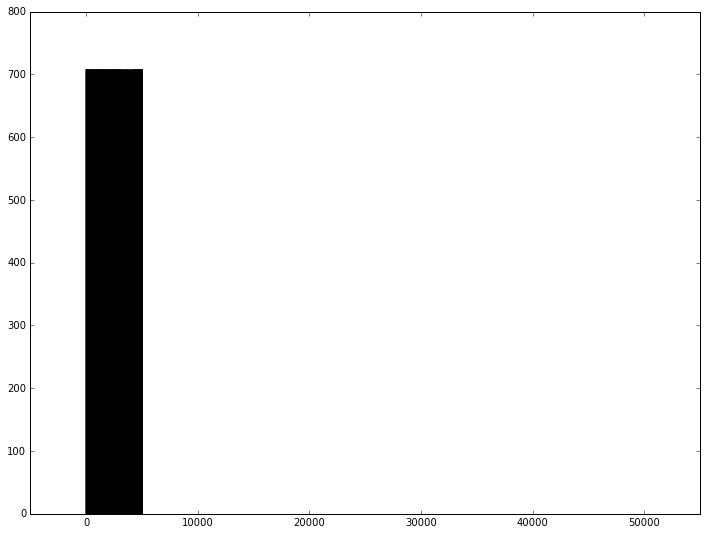

mean radius 2499.995 kpc
stddev radius 1443.37567297 kpc


In [7]:
fig = pyplot.figure(figsize=(12, 9))
amuse_plot.hist(invertion_mass, bins=int(numpy.sqrt(len(invertion_mass))))
amuse_plot.xlim(-0.5e15 | units.MSun, M_dm + (0.5e15 | units.MSun))
pyplot.show()

mean = numpy.mean(invertion_mass).as_quantity_in(units.MSun)
stdev = numpy.std(invertion_mass).as_quantity_in(units.MSun)
print "mean mass", mean
print "stddev mass", stdev

fig = pyplot.figure(figsize=(12, 9))
amuse_plot.hist(invertion_radius, bins=int(numpy.sqrt(len(invertion_radius))))
amuse_plot.xlim(-5 | units.Mpc, (55 | units.Mpc))
pyplot.show()

mean = numpy.mean(invertion_radius).as_quantity_in(units.kpc)
stdev = numpy.std(invertion_radius).as_quantity_in(units.kpc)
print "mean radius", mean
print "stddev radius", stdev

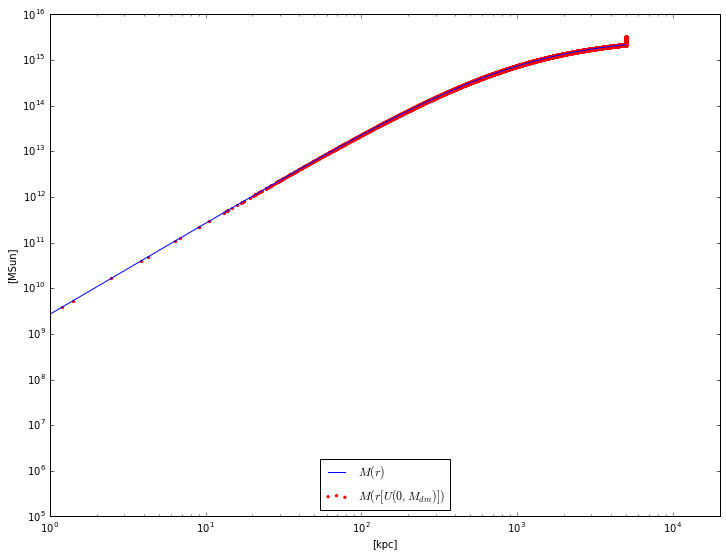

In [8]:
fig = pyplot.figure(figsize=(12, 9))
amuse_plot.loglog(invertion_radius, invertion_mass, c="b", label=r'$M(r)$')
amuse_plot.scatter(radius, mass, c="r", label=r'$M(r[U(0, M_{dm})])$', edgecolor="face", s=5)
amuse_plot.xlim(units.kpc(1), units.kpc(20000))
pyplot.legend(loc=8)
pyplot.show()

Alright, so what we seem to be doing is:

i) sample mass uniformly from 0 to M_dm

ii) numerically create inversion table r(M) by taking equal steps from 0 to the arbitrarily selected number of 50 Mpc. The steps are also arbitrarily selected to be 10 parsec.

iii) using r(M) we can then obtain the radius that corresponds to a certain particle. The mass seems rather uniform, although with 10000 particles there is most def quite some fluctuation in the histogram.


Remarks:

a) the radius histogram seems left skewed, but maximum value has a significantly higher count rate. What is going on here? O_o

b) the histogram of log radius seems to look kind of Gaussian (by eye). Why?

c) the inverted mass histogram looks oddly shaped.

d) the inverted radius histogram looks very uniform

e) the radial mass profile has a very nice looking curve, but the mass and inverted radius has little to no points in the low radius domain (like below 50 kpc). The center region is not well represented?? And at the max of the inverted radius range there is a degeneracy in masses that are assigned to the max radius?